In [1]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt

import save_load_models as save_load
import vector_search as vs

/home/abecker/.conda/envs/BachelorEnv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Compare Article-Title for multiple models

In [6]:
# Load embeddings of models

multiMiniDir = './Embeddings/multilingual-MiniLM/Test_Data_Subset'
msMarcoMiniDir = './Embeddings/msmarco-MiniLM/Test_Data_Subset'
sPubMedBertDir = './Embeddings/SPubMedBERT/Test_Data_Subset'
wikimedicalBioBertDir = './Embeddings/wikimedical-BioBERT/Test_Data_Subset'

sPubMedBertFinetunedv1Dir = './Embeddings/Finetunedv1/SPubMedBERT/Test_Data_Subset'
sPubMedBertFinetunedv2Dir = './Embeddings/Finetunedv2/SPubMedBERT/Test_Data_Subset'
sPubMedBertFinetunedNfcorpusDir = './Embeddings/FinetunedNfCorpus/SPubMedBERT/'

emb1, refList = vs.add_embeddings_to_nparray_from_dir(sPubMedBertDir)
emb2, refList = vs.add_embeddings_to_nparray_from_dir(sPubMedBertFinetunedv1Dir)
emb3, refList = vs.add_embeddings_to_nparray_from_dir(sPubMedBertFinetunedv2Dir)
emb4, refList = vs.add_embeddings_to_nparray_from_dir(sPubMedBertFinetunedNfcorpusDir)

In [3]:
'''
MultiMini
MsMarcoMini
SPubMedBERT
WikiMedicalBERT

SPubMedBERTFinetunedv1
SPubMedBERTFinetunedv2
SPubMedBERTFinetunedNfcorpus
'''
model1_name = "SPubMedBERT"
model2_name = "SPubMedBERTFinetunedv1"
model3_name = "SPubMedBERTFinetunedv2"
model4_name = "SPubMedBERTFinetunedNfcorpus"

name_lst = [model1_name, model2_name, model3_name, model4_name]

[]

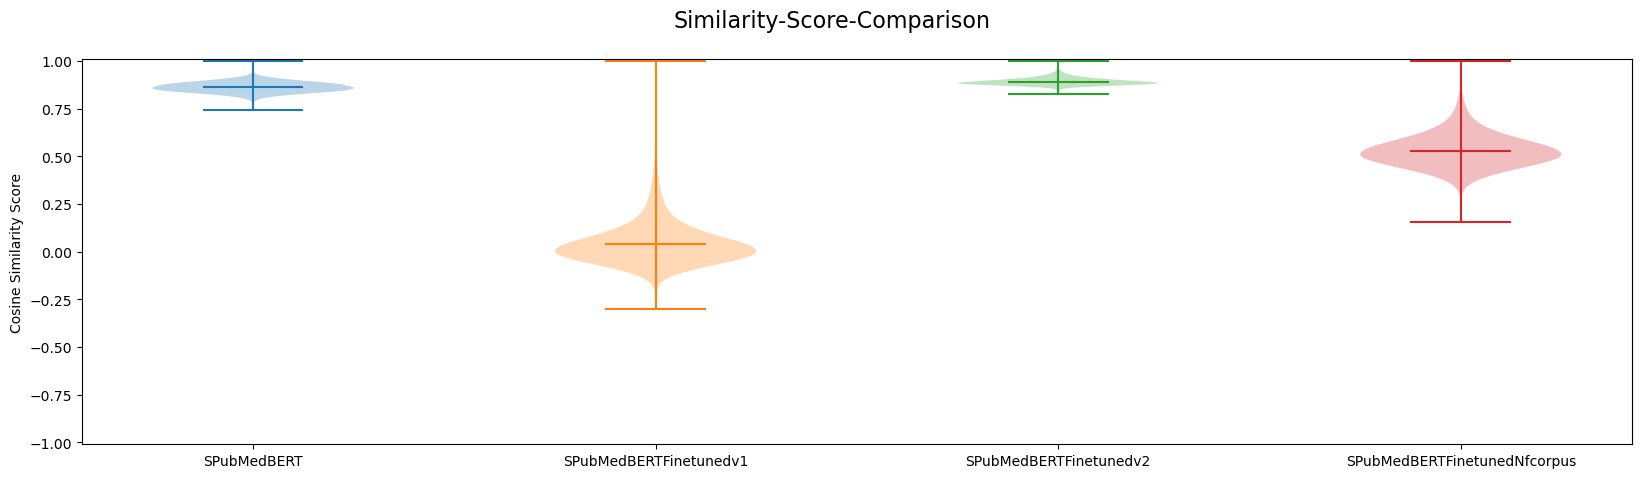

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

emb_lst = [emb1[:2000],emb2[:2000],emb3[:2000]]
sim_lst = []
if len(name_lst) == 4:
    emb_lst.append(emb4[:2000])

for emb in emb_lst:
    sim = vs.calc_all_embedding_similarity(emb, scaled=False)
    sim_lst.append(np.array(sim).flatten())
    
fig = plt.figure(figsize=(5*len(sim_lst), 5))
fig.suptitle('Similarity-Score-Comparison', fontsize=16)
plt.ylabel('Cosine Similarity Score', fontsize=10)

for idx, sim in enumerate(sim_lst):
    plt.violinplot(sim, positions=[idx+1], showmeans=True, showextrema= True)

plt.xticks(range(1, len(name_lst)+1), labels=name_lst)
plt.ylim(ymin=-1.01, ymax=1.01)

plt.savefig(f'Plots/ViolinPlots/Compared{"-".join(name_lst)}.png')
plt.plot()

## Show some metainfo about datasplits

In [4]:
import json, os, statistics

# Test_Data_Subset
# RBO_Test_Data_Subset
# Train_Data_Subset
dataset_dir = './Data/RBO_Test_Data_Subset/'

article_count = 0
title_lengths = []
abstract_lengths = []
journals = dict()
article_types = dict()

with os.scandir(dataset_dir) as entries:
        for entry in entries:
            if entry.is_file():
                # Check if file is json
                _, extension = os.path.splitext(entry.path)
                if extension == '.jsonl':
                    # If the entry is a jsonl-file we can extract all embeddings
                    # Add all embeddings to a list and convert to nparray at the end
                    # Read in Jsonl file
                    try:
                        file_in = open(entry.path, 'r', encoding='utf-8')
                    except OSError:
                        print ("Could not open/read file: ", entry.path)
                        sys.exit()
                    with file_in:
                        for line in file_in:
                            article_data = json.loads(line)
                            article_count+=1

                            title = article_data['metadata']['article_title'] or ""
                            title_lengths.append(len(title.split()))

                            abstract = article_data['text_content']['abstract'] or ""
                            abstract_lengths.append(len(abstract.split()))
                            
                            journals.setdefault(article_data['metadata']['journal_title'], 0)
                            journals[article_data['metadata']['journal_title']] += 1
                            
                            article_types.setdefault(article_data['metadata']['article_type'], 0)
                            article_types[article_data['metadata']['article_type']] += 1
                            
max_journal = max(journals, key=journals.get)
journal_values = list(journals.values())

print(f"There are {article_count} articles in the subset.\n")
print(f"Title-length:\nMedian:{statistics.median(title_lengths)}\nMean:{statistics.mean(title_lengths):.1f}\nMin:{min(title_lengths)}\nMax:{max(title_lengths)}\n")
print(f"Abstract-length:\nMedian:{statistics.median(abstract_lengths)}\nMean:{statistics.mean(abstract_lengths):.1f}\nMin:{min(abstract_lengths)}\nMax:{max(abstract_lengths)}\n")
print(f"""There are {len(journals)} Journals.\nThe most prominent journal is "{max_journal}" with {journals[max_journal]} articles
Median articles per journal: {statistics.median(journal_values)}\nMean articles per journal: {statistics.mean(journal_values):.1f}\n
""")
print(article_types)

There are 49989 articles in the subset.

Title-length:
Median:14
Mean:14.2
Min:1
Max:285

Abstract-length:
Median:205
Mean:203.1
Min:0
Max:1782

There are 2529 Journals.
The most prominent journal is "PLoS ONE" with 4323 articles
Median articles per journal: 3
Mean articles per journal: 19.8


{'research-article': 40219, 'review-article': 4532, 'article-commentary': 99, 'product-review': 76, 'news': 86, 'other': 548, 'book-review': 110, 'letter': 320, 'correction': 696, 'editorial': 524, 'discussion': 104, 'abstract': 182, 'case-report': 1349, 'meeting-report': 18, 'brief-report': 759, 'obituary': 4, 'retraction': 28, 'introduction': 9, 'reply': 10, 'in-brief': 12, 'systematic-review': 108, 'methods-article': 74, 'data-paper': 50, 'rapid-communication': 37, 'announcement': 7, 'expression-of-concern': 20, 'addendum': 2, 'report': 3, 'books-received': 3}
